# Survey Report Analysis

The provided is the clustering of People based on their Big5 personality survey.
The columns[questions] are grouped based on the personality type and is encoded to a variable, where each response to a question is considered as a column. The increased dimensions are reduced by finding the principal components, and are plotted in a graph to visualize the result.
The results are quite good considering the less number of data points. The advantage is that the same model can be used irrespective of the number of people under study, and larger the data more explanatory will be the model for further insight generation. The current analysis groups people based on Agreeableness, Extrovertion and Conscientiousness individually. 
The analysis can be further extended grouping personality types together or all of them to further segment people to 
identify further similarities.

The steps taken along with code has been documented below

In [ ]:
## Importing required libraries. pandas as scikit-learn are the only required libraries

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [100]:
## Segregating questions based on the personality type

agreeablenessCols = ['Am interested in people.', 'Feel little concern for others.', 'Sympathize with others feelings.',
                     'Am not interested in other peoples problems.', 'Am not really interested in others.',
                     'Take time out for others.', 'Feel others emotions.', 'Make people feel at ease.']

conscientiousness = ['Am always prepared.', 'Leave my belongings around.', 'Pay attention to details.',
                     'Make a mess of things.', 'Get chores done right away.', 'Often forget to put things back in their proper place.',
                     'Like order.', 'Shirk my duties.', 'Follow a schedule.', 'Am exacting in my work.']


extrovertionCols = ['Am the life of the party.', 'Dont talk a lot.', 'Feel comfortable around people.',
                    'Keep in the background.', 'Start conversations.', 'Have little to say.', 'Talk to a lot of different people at parties.',
                    'Am quick to understand things.', 'Dont like to draw attention to myself.', 
                    'Dont mind being the center of attention.', 'Am quiet around strangers.']

openness = ['Have difficulty understanding abstract ideas.', 'Have a vivid imagination.', 'Am not interested in abstract ideas.',
                'Have excellent ideas.', 'Do not have a good imagination.', 'Spend time reflecting on things.', 
                'Am full of ideas.', 'Use difficult words.', 'Have a rich vocabulary.']

neuroticismCols = ['Get stressed out easily.', 'Am relaxed most of the time.', 'Insult people.', 'Worry about things.',
                   'Seldom feel blue.', 'Am easily disturbed.', 'Have a soft heart.', 'Get upset easily.',
                   'Change my mood a lot.', 'Have frequent mood swings.', 'Get irritated easily.', 'Often feel blue.']

other = ['reportLink', 'sex', 'age', 'country']

In [110]:
renamedColumns = agreeablenessCols + conscientiousness + extrovertionCols + openness + neuroticismCols + other
dropCols = extrovertionCols + openness + neuroticismCols + other
print((dropCols))

['Am the life of the party.', 'Dont talk a lot.', 'Feel comfortable around people.', 'Keep in the background.', 'Start conversations.', 'Have little to say.', 'Talk to a lot of different people at parties.', 'Am quick to understand things.', 'Dont like to draw attention to myself.', 'Dont mind being the center of attention.', 'Am quiet around strangers.', 'Have difficulty understanding abstract ideas.', 'Have a vivid imagination.', 'Am not interested in abstract ideas.', 'Have excellent ideas.', 'Do not have a good imagination.', 'Spend time reflecting on things.', 'Am full of ideas.', 'Use difficult words.', 'Have a rich vocabulary.', 'Get stressed out easily.', 'Am relaxed most of the time.', 'Insult people.', 'Worry about things.', 'Seldom feel blue.', 'Am easily disturbed.', 'Have a soft heart.', 'Get upset easily.', 'Change my mood a lot.', 'Have frequent mood swings.', 'Get irritated easily.', 'Often feel blue.', 'reportLink', 'sex', 'age', 'country']


In [111]:
## The file has to have the column row removed before running this line

df = pd.read_csv('Report.csv', names = renamedColumns)

In [112]:
print(df.shape)
print(df.head())

(10, 54)
          Am interested in people.  Feel little concern for others.  \
0                    Very Accurate            Moderately Inaccurate   
1                  Very Inaccurate              Moderately Accurate   
2            Moderately Inaccurate            Moderately Inaccurate   
3  Neither Accurate Nor Inaccurate            Moderately Inaccurate   
4  Neither Accurate Nor Inaccurate  Neither Accurate Nor Inaccurate   

  Sympathize with others feelings.  \
0  Neither Accurate Nor Inaccurate   
1              Moderately Accurate   
2                    Very Accurate   
3              Moderately Accurate   
4  Neither Accurate Nor Inaccurate   

  Am not interested in other peoples problems.  \
0                        Moderately Inaccurate   
1                              Very Inaccurate   
2                              Very Inaccurate   
3                          Moderately Accurate   
4                        Moderately Inaccurate   

  Am not really interested in othe

In [107]:
## Finding the number of uniques values for each column

for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print("------------------------------------------------")

Am interested in people.
['Very Accurate' 'Very Inaccurate' 'Moderately Inaccurate'
 'Neither Accurate Nor Inaccurate' 'Moderately Accurate']
5
------------------------------------------------
Feel little concern for others.
['Moderately Inaccurate' 'Moderately Accurate'
 'Neither Accurate Nor Inaccurate' 'Very Inaccurate']
4
------------------------------------------------
Sympathize with others feelings.
['Neither Accurate Nor Inaccurate' 'Moderately Accurate' 'Very Accurate'
 'Moderately Inaccurate']
4
------------------------------------------------
Am not interested in other peoples problems.
['Moderately Inaccurate' 'Very Inaccurate' 'Moderately Accurate'
 'Very Accurate']
4
------------------------------------------------
Am not really interested in others.
['Moderately Inaccurate' 'Very Accurate' 'Neither Accurate Nor Inaccurate'
 'Moderately Accurate']
4
------------------------------------------------
Take time out for others.
['Neither Accurate Nor Inaccurate' 'Very Accurate

In [113]:
df = df.drop(columns = other)
print(df.shape)

['Am the life of the party.', 'Dont talk a lot.', 'Feel comfortable around people.', 'Keep in the background.', 'Start conversations.', 'Have little to say.', 'Talk to a lot of different people at parties.', 'Am quick to understand things.', 'Dont like to draw attention to myself.', 'Dont mind being the center of attention.', 'Am quiet around strangers.', 'Have difficulty understanding abstract ideas.', 'Have a vivid imagination.', 'Am not interested in abstract ideas.', 'Have excellent ideas.', 'Do not have a good imagination.', 'Spend time reflecting on things.', 'Am full of ideas.', 'Use difficult words.', 'Have a rich vocabulary.', 'Get stressed out easily.', 'Am relaxed most of the time.', 'Insult people.', 'Worry about things.', 'Seldom feel blue.', 'Am easily disturbed.', 'Have a soft heart.', 'Get upset easily.', 'Change my mood a lot.', 'Have frequent mood swings.', 'Get irritated easily.', 'Often feel blue.', 'reportLink', 'sex', 'age', 'country']


In [117]:
## One-hot encoding the columns

dfEncoded = pd.get_dummies(df)
print(dfEncoded.shape)

(10, 200)




::: Principal Components :::
[-1.35154785 -0.54793632  0.0694585  -0.48126323 -1.46550962  1.60747013
  1.41279589  1.56976036  0.69596789 -1.50919576]
[-1.00891574 -1.38714908 -1.21422491  1.5111068   1.18652009  0.15961878
  0.24044889  1.03963549 -1.17764752  0.6506072 ]


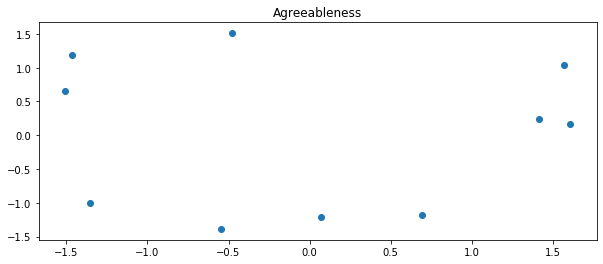

In [138]:
## Finding similarity between people based on agreeableness questions
## From the plot it can be inferred that the principal components has been able to reduce dimensionality of the data to get
## similar people together, considering just 10 data points, with more data we can look for further clustering approaches.
## The following present the cases of Agreeableness, Extrovertion and Conscientiousness.
## The similarity can be analysed by checking the points printed to the excel generated/response generated for each columns
## by the person under study

dfAgree = df[agreeablenessCols]
dfEncoded = pd.get_dummies(dfAgree)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfEncoded)

print('\n')
print("::: Principal Components :::")
print(principalComponents[:,0])
print(principalComponents[:,1])

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
axes.set_title('Agreeableness')
plt.scatter(principalComponents[:,0], principalComponents[:,1])

dfAgree.to_csv('agreeableness.csv')



::: Principal Components :::
[-1.58262959  1.7762624  -1.32920282 -1.09320851 -0.29762029  0.01691882
 -1.51534903  1.57275713  1.55365502  0.89841687]
[ 0.74881967  0.04806643 -0.82392672 -0.06153599  2.61067536 -0.70724449
 -0.90753039 -0.67102404  0.94419445 -1.1804943 ]


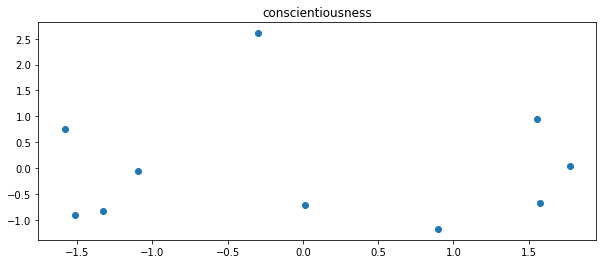

In [139]:
## Finding similarity betwee people based on conscientiousness questions

dfCons = df[conscientiousness]
dfEncoded = pd.get_dummies(dfCons)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfEncoded)

print('\n')
print("::: Principal Components :::")
print(principalComponents[:,0])
print(principalComponents[:,1])

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
axes.set_title('conscientiousness')
plt.scatter(principalComponents[:,0], principalComponents[:,1])

dfCons.to_csv('conscientiousness.csv')



::: Principal Components :::
[-0.20855517  0.30197519 -0.83799352  1.75757022 -2.02536292 -0.83221193
  1.48453385 -1.86962698  2.05616076  0.17351048]
[-1.74090563 -1.61645431  0.97578629 -0.35309378  0.03947105 -0.47685098
  0.08236926  0.25384583  0.58785027  2.24798201]


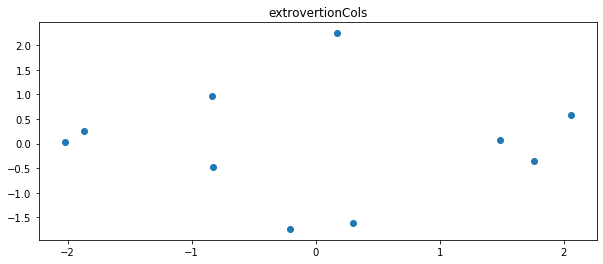

In [140]:
## Finding similarity between people based on extrovertion questions


dfExtr = df[extrovertionCols]
dfEncoded = pd.get_dummies(dfExtr)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfEncoded)

print('\n')
print("::: Principal Components :::")
print(principalComponents[:,0])
print(principalComponents[:,1])

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
axes.set_title('extrovertionCols')
plt.scatter(principalComponents[:,0], principalComponents[:,1])

dfExtr.to_csv('extrovertion.csv')

